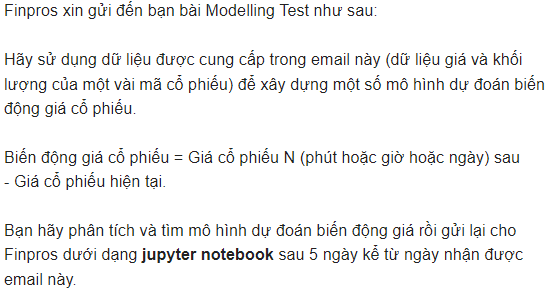

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from func import * # this also can be implement by below cell

In [ ]:
# Function in func

# # adfuller library 
# from statsmodels.tsa.stattools import adfuller
# import matplotlib.pyplot as plt 
# import pandas as pd
# from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.graphics.tsaplots import plot_pacf
# from sklearn.model_selection import TimeSeriesSplit
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import seaborn as sns
# import numpy as np

# # check_adfuller
# def check_adfuller(ts):
#     # Dickey-Fuller test
#     result = adfuller(ts, autolag='AIC')
#     print('Test statistic: ' , result[0])
#     print('p-value: '  ,result[1])
#     print('Critical Values:' ,result[4])
# # check_mean_std
# def check_mean_std(ts):
#     #Rolling statistics
#     rolmean = ts.rolling(6).mean()
#     rolstd = ts.rolling(6).std()
#     plt.figure(figsize=(10,5))   
#     orig = plt.plot(ts, color='red',label='Original')
#     mean = plt.plot(rolmean, color='black', label='Rolling Mean')
#     std = plt.plot(rolstd, color='green', label = 'Rolling Std')
#     plt.xlabel("Date")
#     plt.ylabel("Mean Temperature")
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.legend()
#     plt.show()

# def eda(ts, title = ''):
#     f,ax = plt.subplots(1,3,figsize = (20,4), width_ratios=[2,1,1])
#     ax[0].plot(ts)
#     plot_acf(ts,lags=20, ax=ax[1])
#     plot_pacf(ts,lags=20, ax=ax[2])
#     check_adfuller(ts)
#     ax[0].set_title(title)
#     plt.show()


# def valid_arima(data, target, order, n_forecast):

#     X = data.index  
#     y = data[target]

#     # Cross validation
#     score_mae = []
#     score_mse = []
#     N_SPLITS = 5
#     folds = TimeSeriesSplit(n_splits=N_SPLITS)
#     for i, (train_index, val_index) in enumerate(folds.split(X)):
#         X_train, X_val = X[train_index], X[val_index]
#         y_train, y_val = y[train_index], y[val_index]
#         y_train.index = X_train.values
#         y_val.index = X_val.values

#         model = ARIMA(y_train, order=order)
#         model_fit = model.fit()
#         # predict
#         y_pred = model_fit.predict(len(y_train),len(y_train)+len(y_val)-1)

#         # Calculate metrics
#         score_mae.append(mean_absolute_error(y_val, y_pred))
#         score_mse.append(mean_squared_error(y_val, y_pred))


#     # Testing
#     train = data[target][:-n_forecast]
#     test = data[[target]][-n_forecast:]
#     # fit model
#     model = ARIMA(train, order=order)
#     model_fit = model.fit()
#     # predict
#     forecast = model_fit.predict(len(train),len(train)+len(test)-1)


#     # Visualization
#     f, ax = plt.subplots(1,2,figsize=(15,3),width_ratios=[3,1.2])

#     pred = pd.Series(forecast.values,index=test.index)
#     ax[0].plot(data[target].iloc[-n_forecast-30:],label = "original")
#     ax[0].plot(pred,label = "predicted")
#     ax[0].set_title("Time Series Forecast")
#     ax[0].set_xlabel("Date")
#     ax[0].set_ylabel(target)
#     print(f' MAE: {mean_absolute_error(test, forecast)}')
#     print(f' MSE: {mean_squared_error(test, forecast)}')
#     print(f' AIC: {model_fit.aic}')
#     print(f' BIC: {model_fit.bic}')


#     sns.lineplot(x=[str(i) for i in np.arange(1,N_SPLITS+1)], y=score_mae,  color='gold', label='MAE', ax=ax[1])
#     sns.lineplot(x=[str(i) for i in np.arange(1,N_SPLITS+1)], y=score_mse, color='indianred', label='MSE', ax=ax[1])
#     ax[1].set_title('Loss', fontsize=14)
#     ax[1].set_xlabel(xlabel='Fold', fontsize=14)
#     plt.show()

In [2]:
# Warning Removal
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [3]:
df1 = pd.read_csv('MSN.csv')
df2 = pd.read_csv('PNJ.csv')
df3 = pd.read_csv('VIC.csv')
df4 = pd.read_csv('FPT.csv')

# MSN

In [4]:
df1.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135354 entries, 0 to 135353
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         135354 non-null  object 
 1   Date/Time      135354 non-null  object 
 2   Open           135354 non-null  float64
 3   High           135354 non-null  float64
 4   Low            135354 non-null  float64
 5   Close          135354 non-null  float64
 6   Volume         135354 non-null  int64  
 7   Open Interest  135354 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 8.3+ MB


In [6]:
df1.describe()

,Open,High,Low,Close,Volume,Open Interest
count,135354.000000,135354.000000,135354.000000,135354.000000,1.353540e+05,135354.0
mean,74.878809,74.931668,74.834625,74.880759,5.683578e+03,0.0
std,15.418074,15.426954,15.412677,15.418857,2.798513e+04,0.0
min,46.500000,46.500000,46.400000,46.400000,1.000000e+01,0.0
25%,57.900000,57.900000,57.800000,57.800000,5.000000e+02,0.0
50%,79.100000,79.200000,79.100000,79.100000,2.000000e+03,0.0
75%,86.000000,86.100000,86.000000,86.000000,5.560000e+03,0.0
max,117.800000,118.000000,117.700000,118.000000,3.300680e+06,0.0


In [7]:
def clean_data(df):
    # drop None value
    df.dropna(inplace=True)
    # drop duplicated row
    df.drop_duplicates(inplace=True)
    # Change Date/Time type from object to datetime
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    # Select only Y - M - D
    df['Date'] = df['Date/Time'].dt.date
    # Group by day to fit the model
    data = df.groupby(['Date'], as_index=False).agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    })
    return data

In [8]:
df1=clean_data(df1)
df2=clean_data(df2)
df3=clean_data(df3)
df4=clean_data(df4)

# prepare data for approach 2
df12 = df1.merge(df2,on='Date',suffixes=['_MSN','_PNJ'])
df34 = df3.merge(df4,on='Date',suffixes=['_VIC','_FPT'])
combine = df12.merge(df34,on='Date')

# EDA

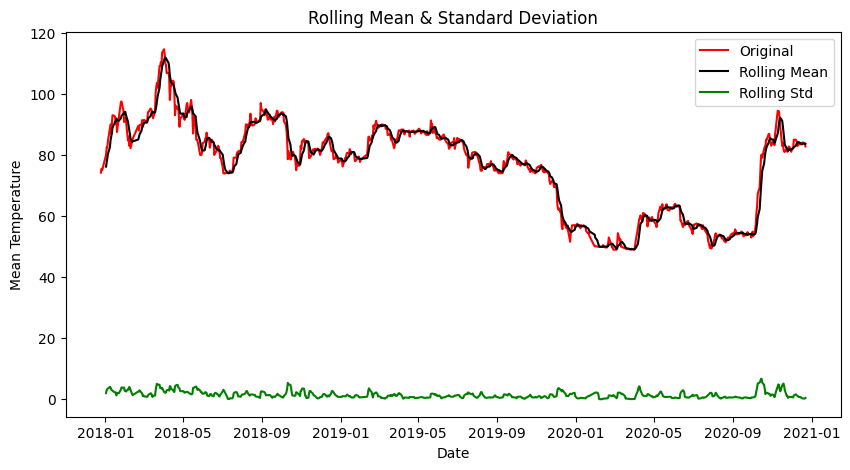

Test statistic:  -1.9078164131932254
p-value:  0.328393005037665
Critical Values: {'1%': -3.439302726125018, '5%': -2.8654910924750547, '10%': -2.5688740002680124}


In [9]:
timeSeries = df1.loc[:, ["Date","Close"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)
check_mean_std(ts)
check_adfuller(ts.Close)

+ Mean vary, constant var
+ high p_value, t_test > t_crit -> not stationary


In [10]:
df1['Diff_1'] = df1.Close.diff()
df1['Diff_2'] = df1.Close.diff(2)

df1.index = df1.Date
df1 = df1.drop("Date",axis=1)
ts1 = df1.Diff_1.dropna()
ts2 = df1.Diff_2.dropna()

Test statistic:  -7.280157463251093
p-value:  1.5077526060227434e-10
Critical Values: {'1%': -3.439302726125018, '5%': -2.8654910924750547, '10%': -2.5688740002680124}


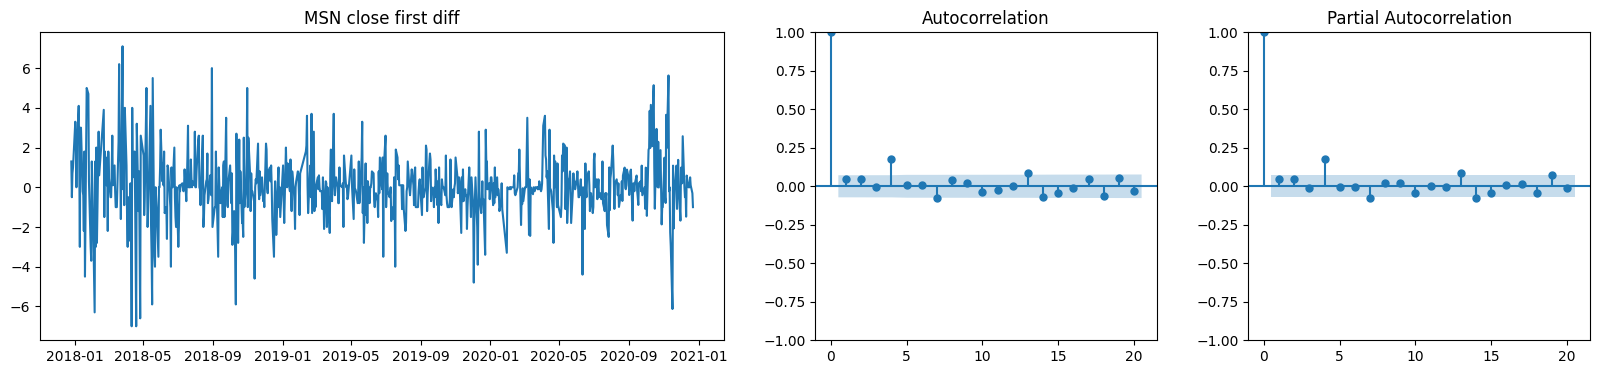

In [11]:
eda(ts1, 'MSN close first diff')
# ACF, PACF cut off at lag 4
# Stationary

Test statistic:  -6.70301487357807
p-value:  3.846666351559767e-09
Critical Values: {'1%': -3.4393273074073045, '5%': -2.8655019247555154, '10%': -2.568879771109793}


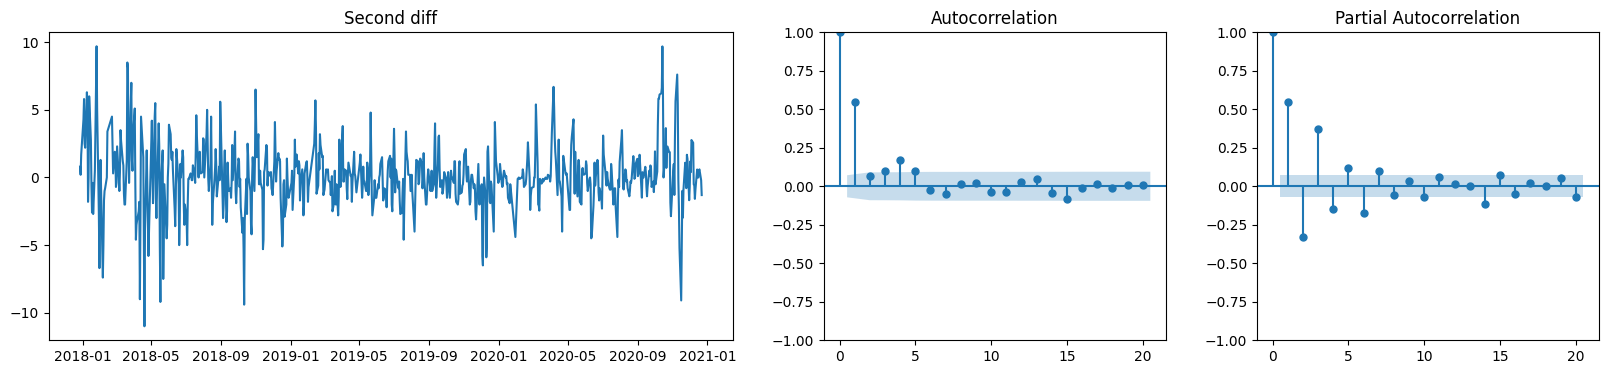

In [12]:
eda(ts2, 'Second diff')
# ACF cut of at lag 1,4 -> q = [1,4]
# PACF decay -> p = 0

# Modeling

 MAE: 0.36649966534273315
 MSE: 0.2230055814836291
 AIC: 2855.594042595006
 BIC: 2901.701003042184


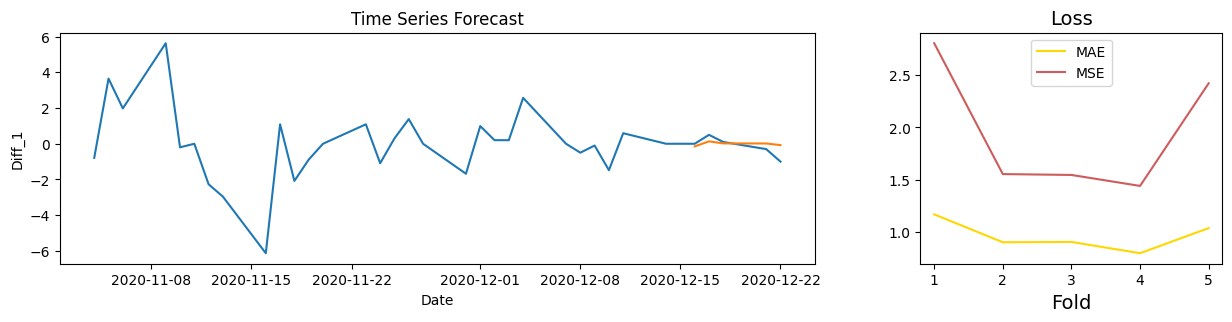

In [13]:
valid_arima(df1,'Diff_1', [4,0,4], 5)

 MAE: 0.5266246882845382
 MSE: 0.47757562072569354
 AIC: 2878.7768808620394
 BIC: 2906.441057130346


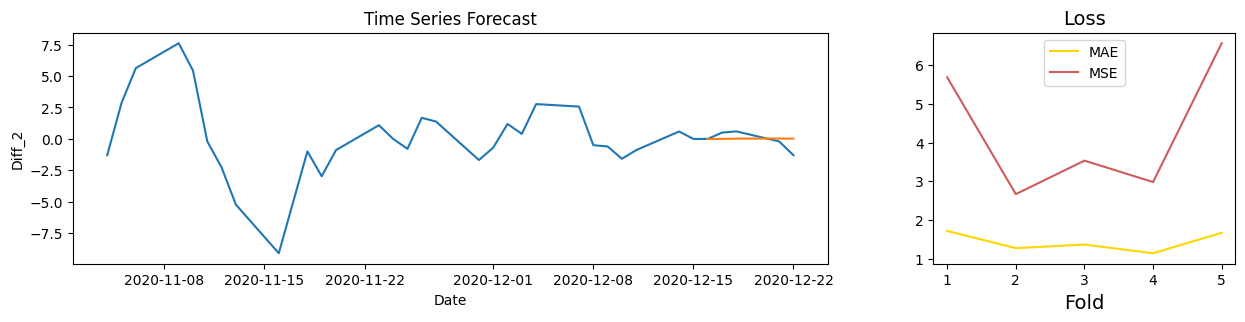

In [14]:
valid_arima(df1,'Diff_2', [0,0,4], 5)

 MAE: 0.5227421567025573
 MSE: 0.47255144628888635
 AIC: 2876.0044477288175
 BIC: 2889.836535862971


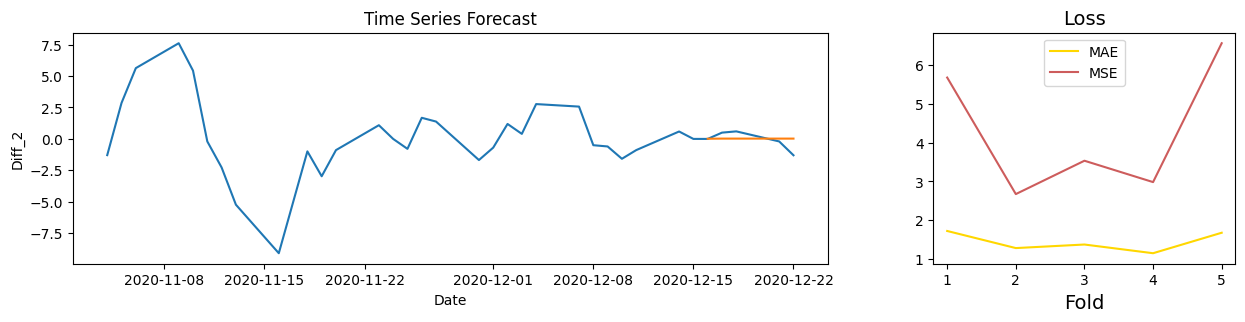

In [15]:
valid_arima(df1,'Diff_2', [0,0,1], 5)

+ We can use ARIMA(4,0,4) to forecast next day price's change of MSN
+ For the change in next 2 day using ARIMA(0,0,1) (lower error and aic,bic compare to ARIMA(0,0,4))

# PNJ

In [16]:
df2['Diff_1'] = df2.Close.diff()
df2.index = df2.Date
df2 = df2.drop("Date",axis=1)
pnj = df1[['Diff_1']].dropna()

Test statistic:  -7.280157463251093
p-value:  1.5077526060227434e-10
Critical Values: {'1%': -3.439302726125018, '5%': -2.8654910924750547, '10%': -2.5688740002680124}


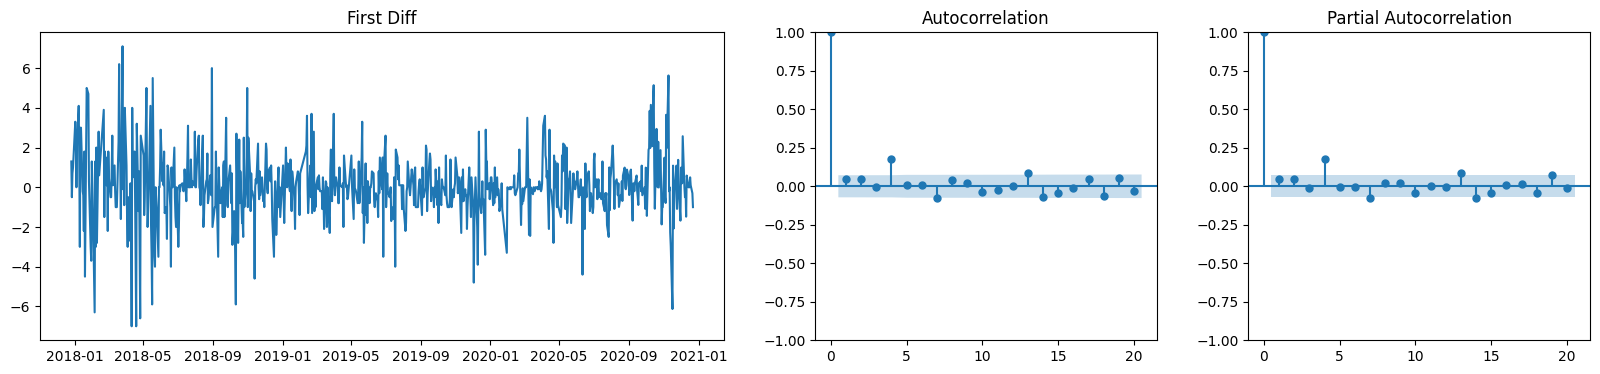

In [17]:
eda(pnj, 'First Diff')
# Stationary
# -> p = 4, q = 4 -> ARIMA(4,0,4)

 MAE: 0.3664996686330272
 MSE: 0.22300557372859733
 AIC: 2855.594042597164
 BIC: 2901.687535028838


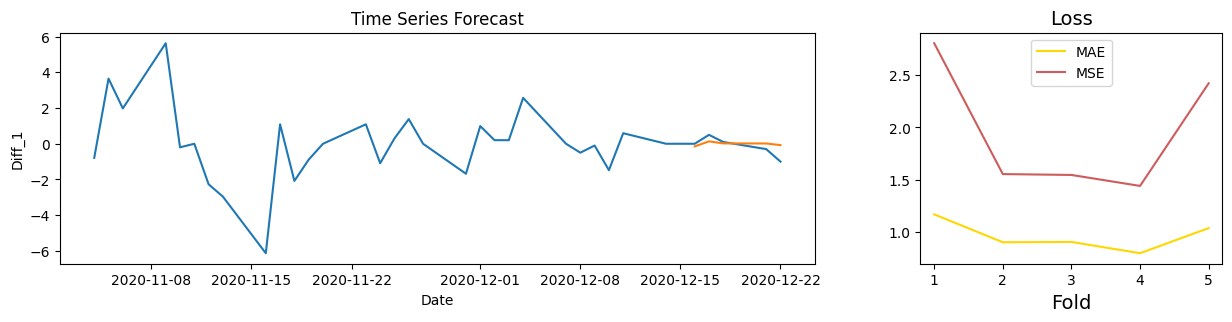

In [18]:
valid_arima(pnj,'Diff_1', [4,0,4], 5)

# VIC

In [19]:
df3['Diff_1'] = df3.Close.diff()
df3.index = df3.Date
df3 = df3.drop("Date",axis=1)
vic = df3[['Diff_1']].dropna()

Test statistic:  -8.389527494056653
p-value:  2.387470324929002e-13
Critical Values: {'1%': -3.442495284887805, '5%': -2.86689723299801, '10%': -2.5696232204003677}


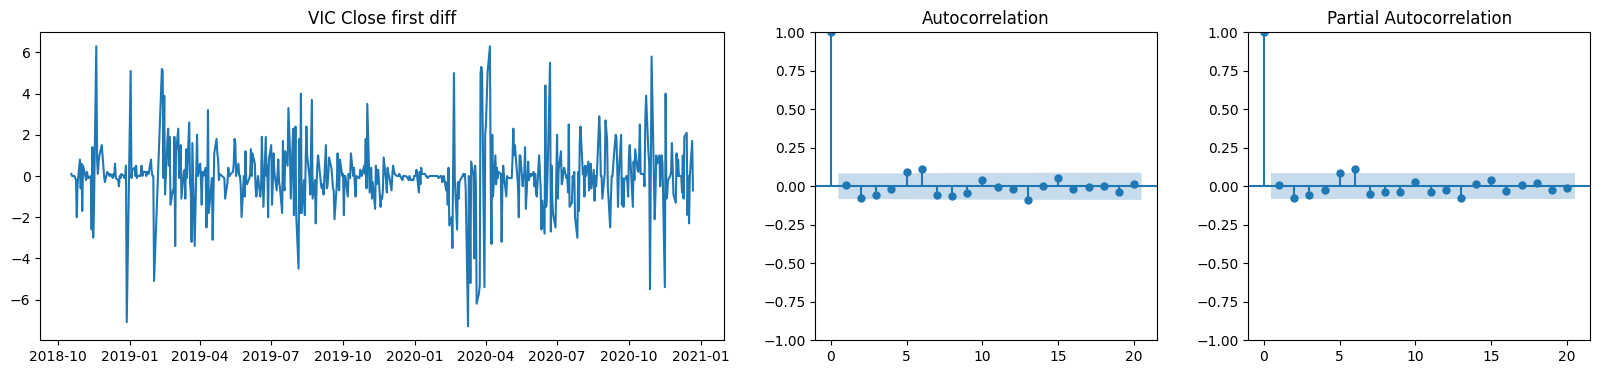

In [20]:
eda(vic, 'VIC Close first diff')
# Stationary
# -> p = 6, q = 6 -> ARIMA(6,0,6)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertibl

 MAE: 0.9162725651250483
 MSE: 1.5510177326852657
 AIC: 2079.3972258388776
 BIC: 2139.5309498590327


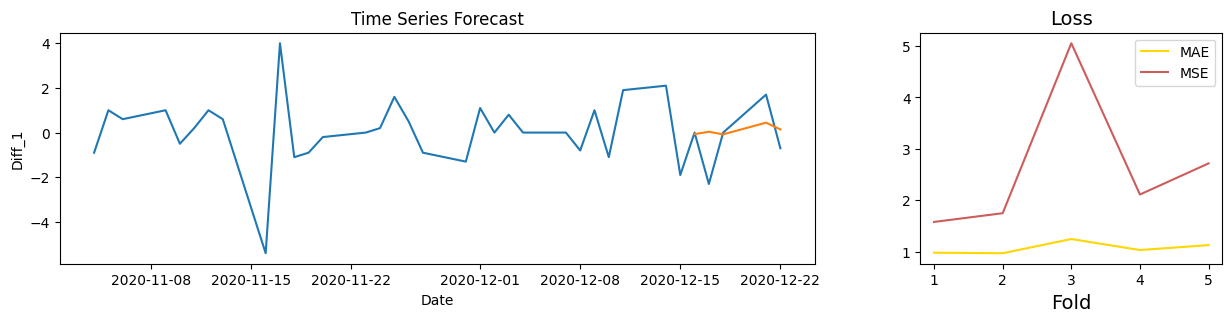

In [21]:
valid_arima(vic,'Diff_1', [6,0,6], 5)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertibl

 MAE: 0.8760099462210615
 MSE: 1.547223373279962
 AIC: 2083.068717518063
 BIC: 2138.883168143067


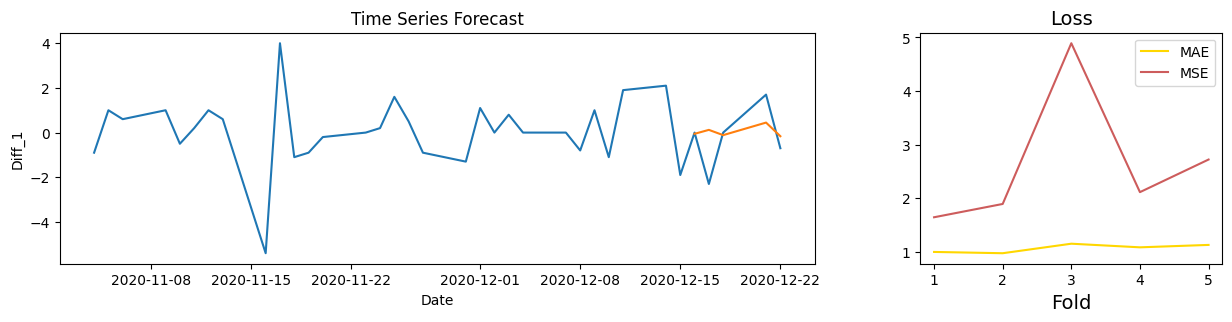

In [22]:
valid_arima(vic,'Diff_1', [6,1,6], 5)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

 MAE: 1.193286161611317
 MSE: 2.355865042058848
 AIC: 2101.7534279528145
 BIC: 2157.5438267670725


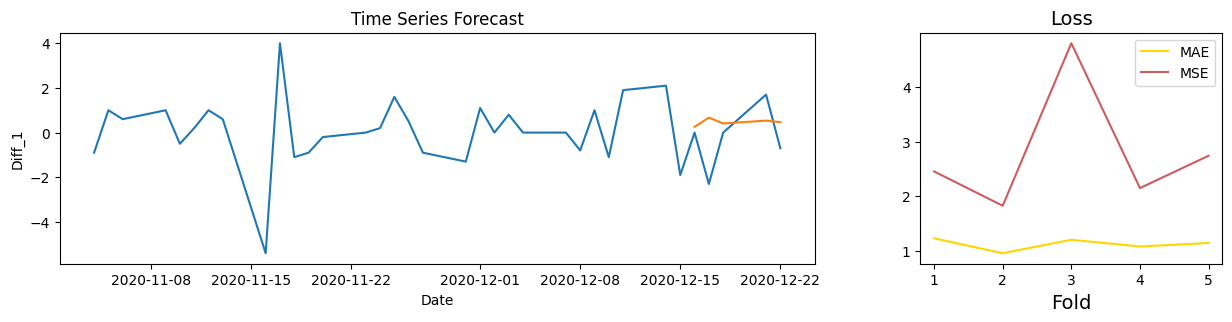

In [23]:
valid_arima(vic,'Diff_1', [6,2,6], 5)

+ For VIC, the low error and BIC indicate ARIMA(6,1,6) is better than ARIMA(6,0,6)

# FPT

In [24]:
df4['Diff_1'] = df4.Close.diff()
df4.index = df4.Date
df4 = df4.drop("Date",axis=1)
fpt = df4[['Diff_1']].dropna()

Test statistic:  -23.24686739557057
p-value:  0.0
Critical Values: {'1%': -3.4435761493506294, '5%': -2.867372960189225, '10%': -2.5698767442886696}


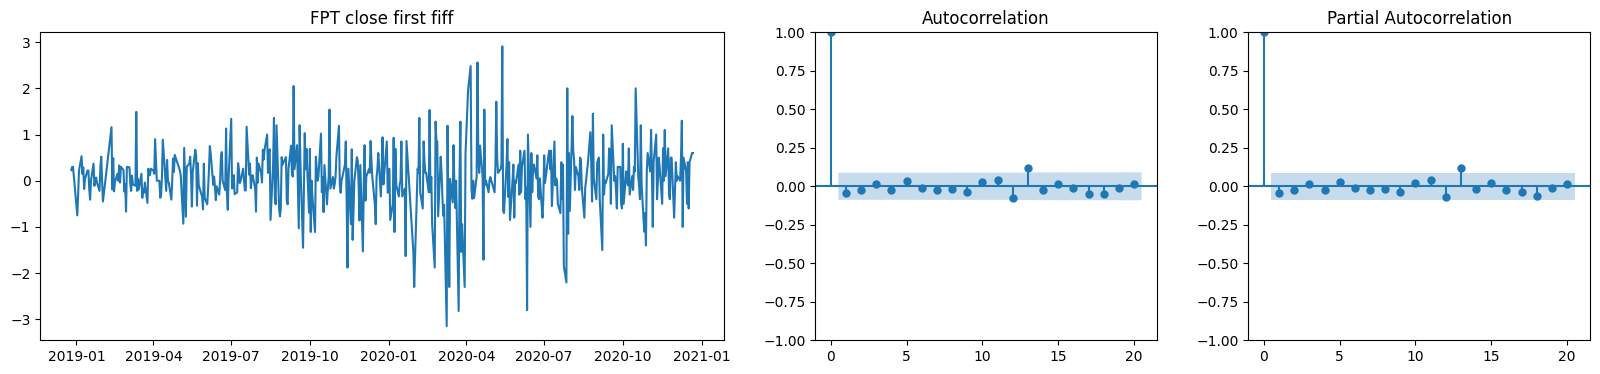

In [25]:
eda(fpt, 'FPT close first fiff')
# Stationary
# -> p = 13, q = 13 -> ARIMA(13,0,13)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertibl

 MAE: 0.5232790522383632
 MSE: 0.311256867538403
 AIC: 1091.1885589338476
 BIC: 1208.8028158070429


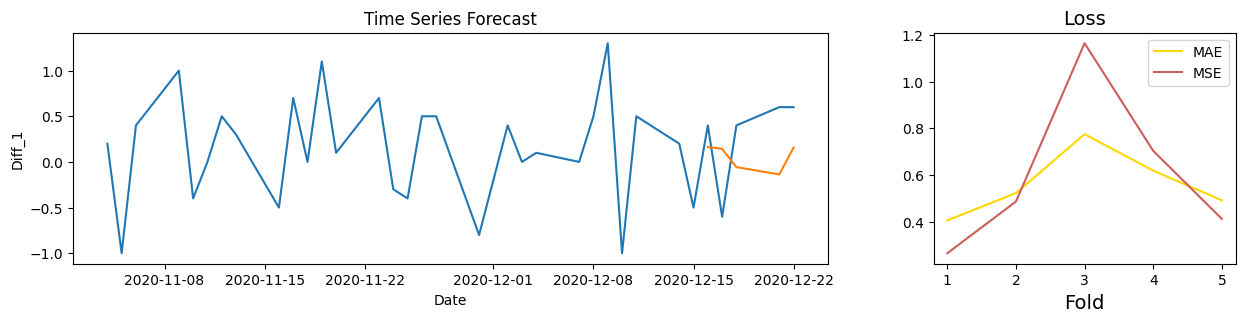

In [26]:
valid_arima(fpt,'Diff_1', [13,0,13], 5)

# Approach 2

In [27]:
combine['MSN_TARGET'] = combine['Close_MSN'].shift(-5) - combine['Close_MSN']
combine['VIC_TARGET'] = combine['Close_VIC'].shift(-5) - combine['Close_VIC']
combine['FPT_TARGET'] = combine['Close_FPT'].shift(-5) - combine['Close_FPT']
combine['PNJ_TARGET'] = combine['Close_PNJ'].shift(-5) - combine['Close_PNJ']
combine = combine[:-5]

<Axes: >

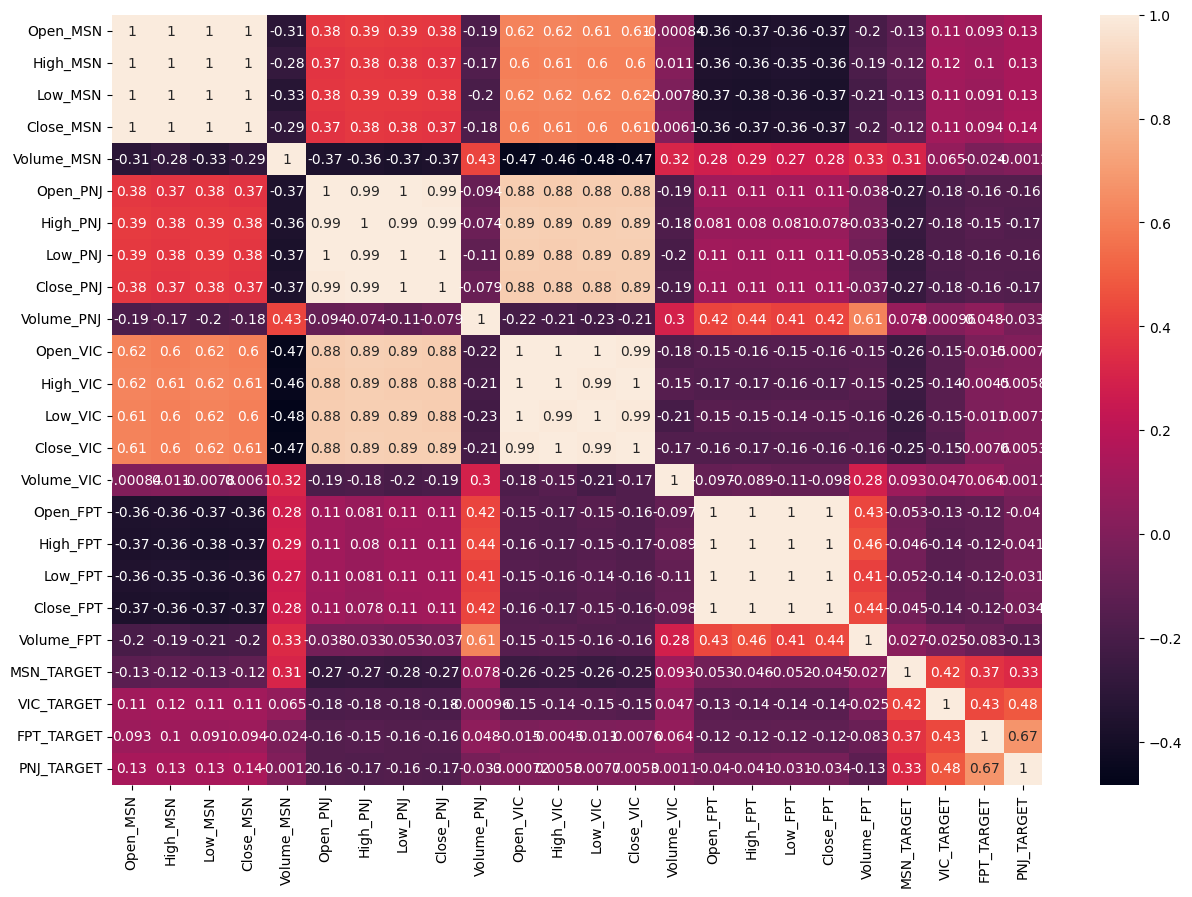

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(combine.iloc[:,1:].corr(),annot=True)

In [29]:
combine.index = combine.Date
combine = combine.drop("Date",axis=1)
# Split data to training and test set 
train, test = combine[:-5], combine[-5:] 

In [30]:
# MSN
X_train, X_test = train.drop(['MSN_TARGET','VIC_TARGET','PNJ_TARGET','FPT_TARGET'],axis=1), test.drop(['MSN_TARGET','VIC_TARGET','PNJ_TARGET','FPT_TARGET'],axis=1)
y_train, y_test = train['MSN_TARGET'] , test['MSN_TARGET']

In [31]:
from sklearn import metrics

def evaluate_model(y_pred, y_train, X_train):
    fig, ax= plt.subplots(1,2,figsize=(10,5))
    sns.distplot((y_train-y_pred),ax= ax[0])
    # Checking Normality of errors
    ax[0].set_title("Histogram of Residuals")
    ax[0].set_xlabel("Residuals")
    ax[0].set_ylabel("Frequency")
    # The difference between actual close and predicted close price
    ax[1].scatter(y_pred,y_train)
    ax[1].set_ylabel("Close Prices")
    ax[1].set_xlabel("Predicted Close price")
    ax[1].set_title("Prices vs Predicted prices")
    plt.tight_layout()
    # Model Evaluation
    print('R^2:',metrics.r2_score(y_train,y_pred))
    print('MAE:', metrics.mean_absolute_error(y_train, y_pred))
    print('MSE:', metrics.mean_squared_error(y_train, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
    return plt.show()

# Modeling

R^2: 0.9999373745837307
MAE: 0.019719414271277106
MSE: 0.000790757882523685
RMSE: 0.028120417538217403


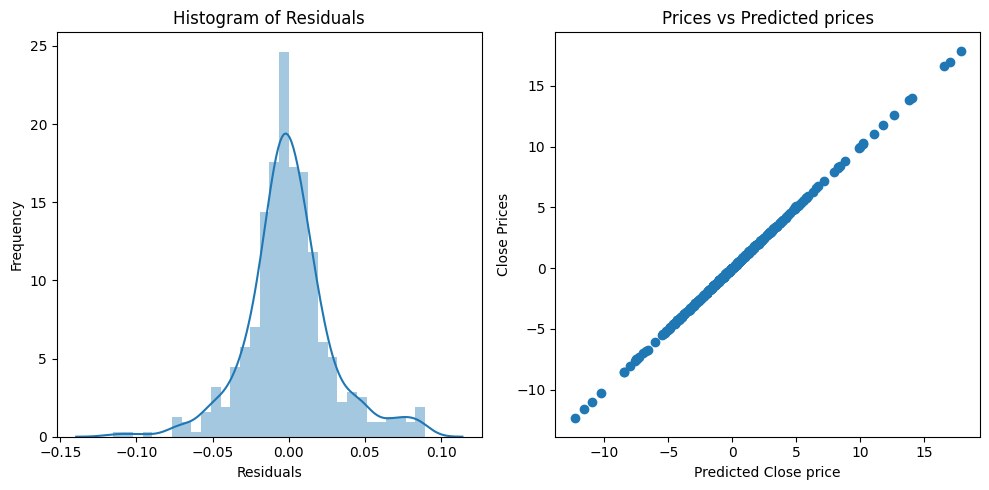

In [32]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
xgb = XGBRegressor()
# Train the model using the training sets 
xgb.fit(X_train, y_train)
# Predict
y_pred = xgb.predict(X_train)
# Evaluate
evaluate_model(y_pred, y_train, X_train)

In [33]:
# Predicting Test data with the model
y_test_pred = xgb.predict(X_test)

print(f' R^2: {metrics.r2_score(y_test, y_test_pred)}')
print(f' MAE: {metrics.mean_absolute_error(y_test, y_test_pred)}')
print(f' MSE: {metrics.mean_squared_error(y_test, y_test_pred)}')
print(f' RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))}')

 R^2: -0.003341629091571985
 MAE: 0.7004703536033645
 MSE: 0.5795702586284568
 RMSE: 0.7612951192727146


+ This seem to be overfit

# Tunning

In [34]:
from sklearn.model_selection import GridSearchCV
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        # 'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        "learning_rate": (0.05, 0.10, 0.15)
        }

grid_search = GridSearchCV(xgb, param_grid=params, scoring='neg_mean_squared_error', n_jobs=-1, cv= 3, verbose=0 )
grid_search.fit(X_train, y_train)
print('\n Best estimator:')
print(grid_search.best_estimator_)
best_xgb = grid_search.best_estimator_


 Best estimator:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1.5, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


 R^2: 0.1423580453863138
 MAE: 0.5857170147299797
 MSE: 0.4954082986630507
 RMSE: 0.7038524693876201


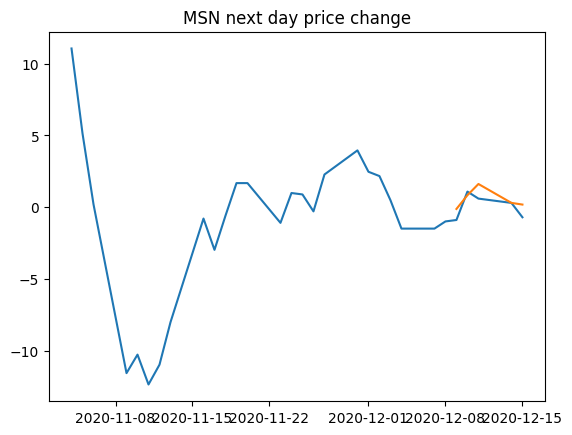

In [35]:
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)
plt.plot(combine['MSN_TARGET'][-30:], label = "original")
plt.plot(pd.DataFrame(y_pred,index = y_test.index), label = "predicted")
print(f' R^2: {metrics.r2_score(y_test, y_pred)}')
print(f' MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f' MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f' RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
plt.title('MSN next day price change')
plt.show()

 R^2: 0.35094786951388657
 MAE: 0.7518797054886818
 MSE: 1.0971577213737298
 RMSE: 1.0474529685736396


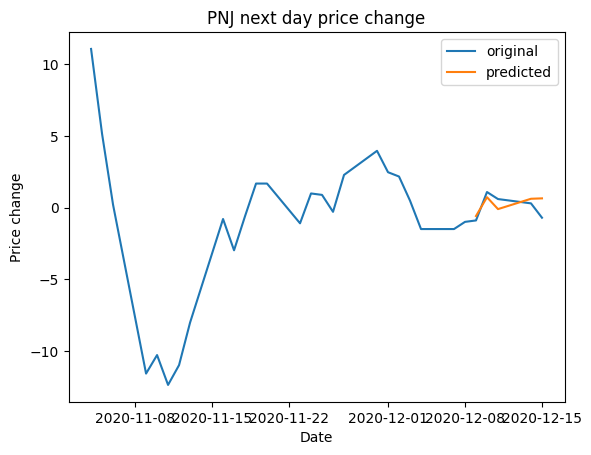

In [36]:
# PNJ

X_train, X_test = train.drop(['MSN_TARGET','VIC_TARGET','PNJ_TARGET','FPT_TARGET'],axis=1), test.drop(['MSN_TARGET','VIC_TARGET','PNJ_TARGET','FPT_TARGET'],axis=1)
y_train, y_test = train['PNJ_TARGET'] , test['PNJ_TARGET']

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        # 'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        "learning_rate": (0.05, 0.10, 0.15)
        }

grid_search = GridSearchCV(xgb, param_grid=params, scoring='neg_mean_squared_error', n_jobs=-1, cv= 3, verbose=0 )
grid_search.fit(X_train, y_train)
# print('\n Best estimator:')
# print(grid_search.best_estimator_)
best_xgb = grid_search.best_estimator_

# best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)
plt.plot(combine['MSN_TARGET'][-30:], label = "original")
plt.plot(pd.DataFrame(y_pred,index = y_test.index), label = "predicted")
print(f' R^2: {metrics.r2_score(y_test, y_pred)}')
print(f' MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f' MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f' RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
plt.xlabel('Date')
plt.ylabel('Price change')
plt.legend()
plt.title('PNJ next day price change')
plt.show()

 R^2: -0.9819539873382825
 MAE: 1.6633704383671273
 MSE: 3.245647849665164
 RMSE: 1.8015681640352008


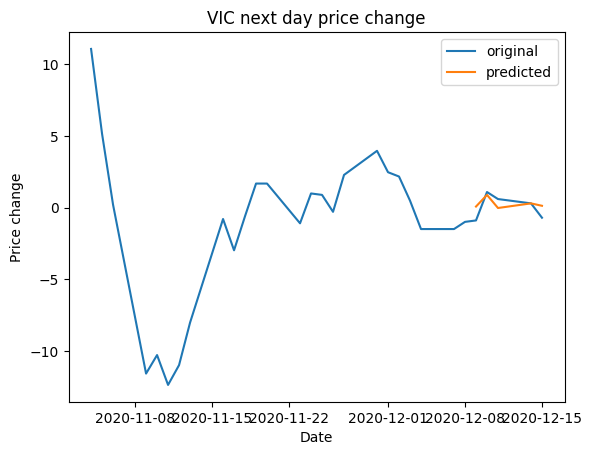

In [37]:
# VIC

X_train, X_test = train.drop(['MSN_TARGET','VIC_TARGET','PNJ_TARGET','FPT_TARGET'],axis=1), test.drop(['MSN_TARGET','VIC_TARGET','PNJ_TARGET','FPT_TARGET'],axis=1)
y_train, y_test = train['VIC_TARGET'] , test['VIC_TARGET']

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        # 'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        "learning_rate": (0.05, 0.10, 0.15)
        }

grid_search = GridSearchCV(xgb, param_grid=params, scoring='neg_mean_squared_error', n_jobs=-1, cv= 3, verbose=0 )
grid_search.fit(X_train, y_train)
# print('\n Best estimator:')
# print(grid_search.best_estimator_)
best_xgb = grid_search.best_estimator_

# best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)
plt.plot(combine['MSN_TARGET'][-30:], label = "original")
plt.plot(pd.DataFrame(y_pred,index = y_test.index), label = "predicted")
print(f' R^2: {metrics.r2_score(y_test, y_pred)}')
print(f' MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f' MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f' RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
plt.xlabel('Date')
plt.ylabel('Price change')
plt.legend()
plt.title('VIC next day price change')
plt.show()

 R^2: -0.04733694645897302
 MAE: 0.5467408251762393
 MSE: 0.40469099611174625
 RMSE: 0.6361532803591806


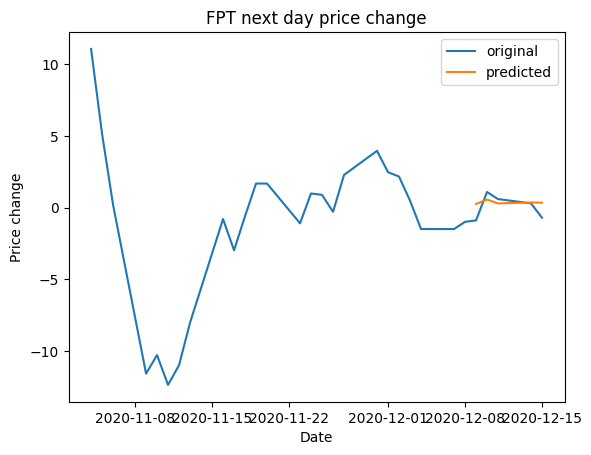

In [38]:
# FPT

X_train, X_test = train.drop(['MSN_TARGET','VIC_TARGET','PNJ_TARGET','FPT_TARGET'],axis=1), test.drop(['MSN_TARGET','VIC_TARGET','PNJ_TARGET','FPT_TARGET'],axis=1)
y_train, y_test = train['FPT_TARGET'] , test['FPT_TARGET']

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        # 'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        "learning_rate": (0.05, 0.10, 0.15)
        }

grid_search = GridSearchCV(xgb, param_grid=params, scoring='neg_mean_squared_error', n_jobs=-1, cv= 3, verbose=0 )
grid_search.fit(X_train, y_train)
# print('\n Best estimator:')
# print(grid_search.best_estimator_)
best_xgb = grid_search.best_estimator_

# best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)
plt.plot(combine['MSN_TARGET'][-30:], label = "original")
plt.plot(pd.DataFrame(y_pred,index = y_test.index), label = "predicted")
print(f' R^2: {metrics.r2_score(y_test, y_pred)}')
print(f' MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f' MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f' RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
plt.xlabel('Date')
plt.ylabel('Price change')
plt.legend()
plt.title('FPT next day price change')
plt.show()

# Conclusion

Since Ensemble method showed a lower error of price change (of 4 stocks) in the next 5 day compared to Time Series tradition model -> Ensemble model is better